In [1]:
# Importamos librerias
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Cargamos los datos
data = pd.read_csv('Wholesale customers data.csv')

In [3]:
# Analizamos tipos de datos
data.shape

(440, 8)

In [5]:
# Calculamos cantidad de valores nulos
data.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [6]:
# Conocemos el formarto de los datos
data.dtypes

Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object

In [7]:
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [9]:
# Se selecionan unos datos al azar para posteriormente verificar el clúster al que pertenecen
indices = [32, 148, 400]
muestras = pd.DataFrame(data.loc[indices], 
                       columns = data.keys()).reset_index(drop = True)
data = data.drop(indices, axis = 0)

In [10]:
# Eliminamos las columnas de región y canal 
data = data.drop(['Region', 'Channel'], axis = 1)
muestras = muestras.drop(['Region', 'Channel'], axis = 1)

In [11]:
# Se realiza el escalamiento de los datos
from sklearn import preprocessing
data_escalada = preprocessing.Normalizer().fit_transform(data)
muestras_escalada = preprocessing.Normalizer().fit_transform(muestras)

In [12]:
# Empezamos analísis de Machine Learning
from sklearn.cluster import KMeans

In [14]:
# Se determinan las variables a evaluar
X = data_escalada.copy()

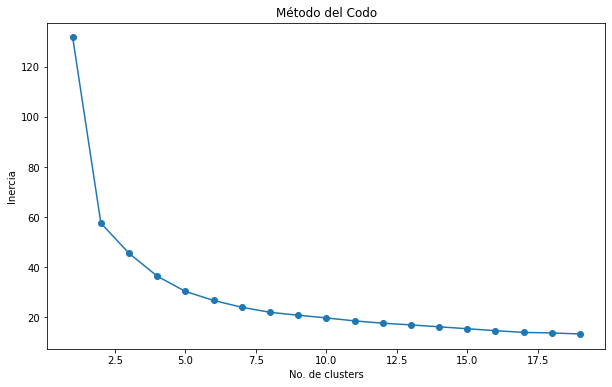

In [15]:
# Hallar el valor óptimo de K 
# Se aplicará el método de codo para hallar K
# Se calcula el algoritmo de agrupación para diferentes valores de K
inercia = [] 
for i in range(1, 20):
    algoritmo = KMeans(n_clusters = i, init = 'k-means++', 
                       max_iter = 300, n_init = 10)
    algoritmo.fit(X)
    # Para cada K, se calcula la suma total del cuadrado dentro del clúster
    inercia.append(algoritmo.inertia_)
# Se traza la curva de la suma de errores cuadráticos 
plt.figure(figsize=[10,6])
plt.title('Método del Codo')
plt.xlabel('No. de clusters')
plt.ylabel('Inercia')
plt.plot(list(range(1, 20)), inercia, marker='o')
plt.show()

In [16]:
# Se aplica el algoritmo de clustering 
# Se define el algoritmo junto con el valor de K
algoritmo = KMeans(n_clusters = 6, init = 'k-means++', 
                   max_iter = 300, n_init = 10)

In [17]:
# Se entrena el algoritmo
algoritmo.fit(X)

KMeans(n_clusters=6)

In [18]:
# Se obtienen los datos de los centroides y las etiquetas
centroides, etiquetas = algoritmo.cluster_centers_, algoritmo.labels_

In [19]:
# Utilicemos los datos de muestras y verifiquemos en que cluster se encuentran
muestra_prediccion = algoritmo.predict(muestras_escalada)
for i, pred in enumerate(muestra_prediccion):
    print("Muestra", i, "se encuentra en el clúster:", pred)

Muestra 0 se encuentra en el clúster: 2
Muestra 1 se encuentra en el clúster: 4
Muestra 2 se encuentra en el clúster: 4


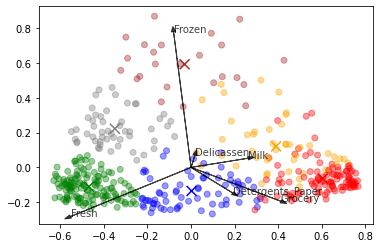

In [20]:
# Graficar los datos junto a los resultados
# Se aplica la reducción de dfrom sklearn.decomposition import PCA
modelo_pca = PCA(n_components = 2)
modelo_pca.fit(X)
pca = modelo_pca.transform(X) 
#Se aplica la reducción de dimsensionalidad a los centroides
centroides_pca = modelo_pca.transform(centroides)
# Se definen los colores de cada clúster
colores = ['blue', 'red', 'green', 'orange', 'gray', 'brown']
# Se asignan los colores a cada clúster
colores_cluster = [colores[etiquetas[i]] for i in range(len(pca))]
# Se grafican los componentes PCA
plt.scatter(pca[:, 0], pca[:, 1], c = colores_cluster, 
            marker = 'o',alpha = 0.4)
# Se grafican los centroides
plt.scatter(centroides_pca[:, 0], centroides_pca[:, 1],
            marker = 'x', s = 100, linewidths = 3, c = colores)
# Se guadan los datos en una variable para que sea fácil escribir el código
xvector = modelo_pca.components_[0] * max(pca[:,0])
yvector = modelo_pca.components_[1] * max(pca[:,1])
columnas = data.columns
# Se grafican los nombres de los clústeres con la distancia del vector
for i in range(len(columnas)):
    # Se grafican los vectores
    plt.arrow(0, 0, xvector[i], yvector[i], color = 'black', 
              width = 0.0005, head_width = 0.02, alpha = 0.75)
    # Se colocan los nombres
    plt.text(xvector[i], yvector[i], list(columnas)[i], color='black', 
             alpha=0.75)
plt.show()imensionalidad a los datos


EJERCICIO

Para revisar el diferente comportamiento de las gráficas (método del codo y la gráfica de resultados) se realizarán las siguientes acciones:
    
    1.Modificar el número de muestras, puede ser del 0 al 400.
    2.Modificar max_iter y n_init para alterar el comportamiento del método del codo.
    Se aplica el algoritmo de clustering 
En el apartado donde se define el algoritmo junto con el valor de K

    3.Modificar el número de cluster puede ser entre 5 ó 6.
    4.Modificar max_iter y n_init (Los mismos que se agregaron en el método del codo).
    

Como resultado las gráficas deben de variar dependiendo de los diferetes números que se estarán agregando.

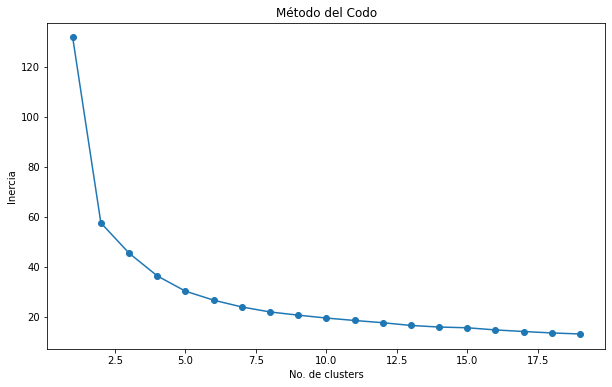

In [33]:
# Hallar el valor óptimo de K 
# Se aplicará el método de codo para hallar K
# Se calcula el algoritmo de agrupación para diferentes valores de K

    # Para cada K, se calcula la suma total del cuadrado dentro del clúster
inercia = [] 
for i in range(1, 20):
    algoritmo = KMeans(n_clusters = i, init = 'k-means++', 
                       max_iter = 250, n_init = 8)
    algoritmo.fit(X)
    # Para cada K, se calcula la suma total del cuadrado dentro del clúster
    inercia.append(algoritmo.inertia_)
# Se traza la curva de la suma de errores cuadráticos 
plt.figure(figsize=[10,6])
plt.title('Método del Codo')
plt.xlabel('No. de clusters')
plt.ylabel('Inercia')
plt.plot(list(range(1, 20)), inercia, marker='o')
plt.show()
   
#Se traza la curva de la suma de errores cuadráticos 


In [35]:
# Se aplica el algoritmo de clustering 
# Se define el algoritmo junto con el valor de K
algoritmo = KMeans(n_clusters = 6, init = 'k-means++', 
                   max_iter = 250, n_init = 8)

In [36]:
# Se entrena el algoritmo
algoritmo.fit(X)

KMeans(max_iter=250, n_clusters=6, n_init=8)

In [37]:
# Se obtienen los datos de los centroides y las etiquetas
centroides, etiquetas = algoritmo.cluster_centers_, algoritmo.labels_

In [38]:
# Utilicemos los datos de muestras y verifiquemos en que cluster se encuentran
muestra_prediccion = algoritmo.predict(muestras_escalada)
for i, pred in enumerate(muestra_prediccion):
    print("Muestra", i, "se encuentra en el clúster:", pred)

Muestra 0 se encuentra en el clúster: 2
Muestra 1 se encuentra en el clúster: 5
Muestra 2 se encuentra en el clúster: 5


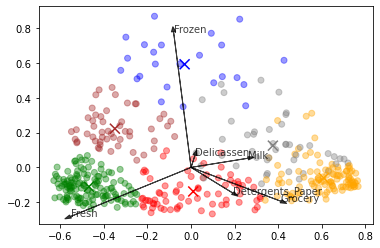

In [39]:
# Graficar los datos junto a los resultados
# Se aplica la reducción de dfrom sklearn.decomposition import PCA
modelo_pca = PCA(n_components = 2)
modelo_pca.fit(X)
pca = modelo_pca.transform(X) 
#Se aplica la reducción de dimsensionalidad a los centroides
centroides_pca = modelo_pca.transform(centroides)
# Se definen los colores de cada clúster
colores = ['blue', 'red', 'green', 'orange', 'gray', 'brown']
# Se asignan los colores a cada clúster
colores_cluster = [colores[etiquetas[i]] for i in range(len(pca))]
# Se grafican los componentes PCA
plt.scatter(pca[:, 0], pca[:, 1], c = colores_cluster, 
            marker = 'o',alpha = 0.4)
# Se grafican los centroides
plt.scatter(centroides_pca[:, 0], centroides_pca[:, 1],
            marker = 'x', s = 100, linewidths = 3, c = colores)
# Se guadan los datos en una variable para que sea fácil escribir el código
xvector = modelo_pca.components_[0] * max(pca[:,0])
yvector = modelo_pca.components_[1] * max(pca[:,1])
columnas = data.columns
# Se grafican los nombres de los clústeres con la distancia del vector
for i in range(len(columnas)):
    # Se grafican los vectores
    plt.arrow(0, 0, xvector[i], yvector[i], color = 'black', 
              width = 0.0005, head_width = 0.02, alpha = 0.75)
    # Se colocan los nombres
    plt.text(xvector[i], yvector[i], list(columnas)[i], color='black', 
             alpha=0.75)
plt.show()
#imensionalidad a los datos